In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
maze = np.array([
    [0, 0, 0, 0],
    [0, 1, 1, 0],
    [0, 1, 1, 0],
    [0, 0, 0, 2]  # '2' is the goal
])

In [ ]:
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
num_episodes = 1000

#lden

In [ ]:
# Initialize Q-table
num_states, num_actions = maze.size, 4
Q = np.zeros((num_states, num_actions))


In [ ]:
actions = ["Up", "Down", "Left", "Right"]

In [ ]:
# Function to move the agent
def move(state, action):
    row, col = divmod(state, 4)
    if action == 0 and row > 0:  # Up
        row -= 1
    elif action == 1 and row < 3:  # Down
        row += 1
    elif action == 2 and col > 0:  # Left
        col -= 1
    elif action == 3 and col < 3:  # Right
        col += 1
    new_state = row * 4 + col
    return new_state



In [ ]:
# Training loop
for _ in range(num_episodes):
    state = 0
    while maze.flat[state] != 2:  # Until goal
        action = np.random.choice(num_actions) if np.random.rand() < epsilon else np.argmax(Q[state])
        new_state = move(state, action)
        Q[state, action] += learning_rate * (-1 + discount_factor * np.max(Q[new_state]) - Q[state, action])
        state = new_state


In [ ]:
def visualize_path(path):
    maze_display = maze.copy()
    maze_display[np.unravel_index(path, maze.shape)] = 3  # Mark path
    plt.imshow(maze_display, cmap="cool")
    for step in path: plt.text(step % 4, step // 4, step, ha='center', va='center', color='black')
    plt.xticks([]); plt.yticks([]); plt.grid()
    plt.show()


Moved to: 1
Moved to: 5
Moved to: 9
Moved to: 13
Moved to: 14
Moved to: 15


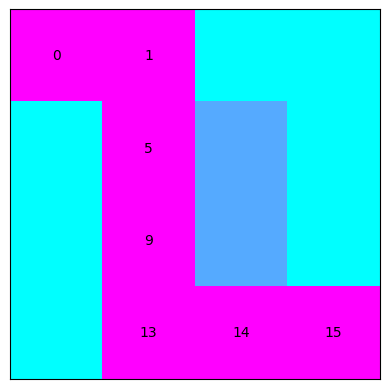

In [ ]:
current_state, path = 0, [0]
while current_state != 15:
    action = np.argmax(Q[current_state])
    current_state = move(current_state, action)
    path.append(current_state)
    print(f"Moved to: {current_state}")

visualize_path(path)
